<center><font size="+4">Introduction to Programming and Machine Learning in Python 2020/2021</font></center>
<center><font size="+4">Module 2</font></center>
<center><font size="+2">Scuola Normale Superiore, Pisa, Italy</font></center>

<center><font size="+2">Course responsibles</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+2">Part 2</font></center>
<center><font size="+1">Breast Cancer Diagnosis 1</font></center>
<center><font size="+1">Overview of data processing & unsupervised learning</font></center>

---
---

**This notebook provides an overview of unsupervised learning pipeline**
   * Exploratory Data Analysis (data pre-processing, missing values, outliers detection, ...)
   * Dimensionality Reduction (PCA)
   * Clustering (K-means)

You can find more details in the [APPENDIX](#APPENDIX) of this document.

In particular, this notebook will introduce the libraries:

   * [scikit-learn](https://scikit-learn.org/stable/): simple and efficient tools for predictive data analysis 
   * [Seaborn](http://seaborn.pydata.org/): seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Text(0.5, 1.0, "Euro 2020: It's coming Rome")

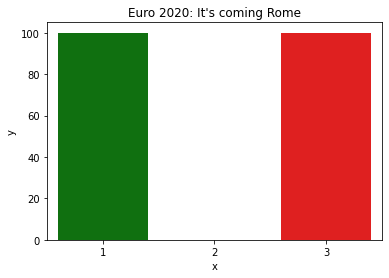

In [4]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'x': [1, 2, 3],'y': [100, 100, 100]})
sns.barplot(x = 'x', y = 'y', data = df, palette=['g','w','r']) \
                                                                                                                                                                    .set_title("Euro 2020: It's coming Rome")

**References** 

Some in-depth study material:

* <mark> [Statistics and Machine Learning in Python, E.Duchesnay, T.Löfstedt, F.Younes](https://duchesnay.github.io/pystatsml)</mark>
* [Topics in Statistical Learning, Francesca Chiaromonte](https://github.com/EMbeDS-education/StatsAndComputing20202021/tree/main/TSL/slides)
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-data-science/9781491912126/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks)
* [Introduction to Data Mining (2nd Edition), Pang-Ning Tan et al.](https://www.cse.msu.edu/~ptan/)
* [Introduction to Machine Learning Algorithms, KNIME AG](https://www.knime.com/knime-course-material-download-page)

Some pictures have been taken from these sources.

# What Is Machine Learning?

<img src="images/whats_ml.jpg" alt="ML" style="width: 400px;"/>

Machine learning can be categorized into two main types: supervised learning and unsupervised learning.

- Supervised learning models tries to learn the relationship between measured features X of data and some labels y associated with the data; The learning algorithm adjusts (learns) the model parameters through a number of iterations to maximize/minimize a likelihood/error function on output. Once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into:
  - *Classification* tasks, the labels are discrete categories
  - *Regression* tasks, the labels are continuous quantities. 

- Unsupervised learning involves modeling the features of a dataset X without reference to any label, and is often described as “letting the dataset speak for itself.” These models include tasks such as:
    - *Outlier Detection* is the identification of rare items
    - *Dimensionality Reduction* search for a lower-dimensional representations of the data.
    - *Clustering* identify distinct groups of data

# Benign and Malignant Breast Cancer Case Study 
We will analize Wisconsin Breast Cancer Dataset (WBCD), features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

<img src="images/Breast-Biopsy-2.jpg" >

![alt text](images/fna-benign1.png)
![alt text](images/fna-malignant1.png)

**Attribute Information**
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

**Labels Class:**
* malignant
* benign



This dataset is also available via the ftp server UW CS: http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/

![](images/machine_learning_cancer.png)


In [5]:
# # [COLAB] uncomment and run this cell if you are on COLAB 
# !git clone https://github.com/EMbeDS-education/SNS-IProML2021.git

# import os
# os.chdir('/content/SNS-IProML2021/jupyter/jupyterNotebooks')

## Prerequisites
We will start by installing the necessary tools

In [6]:
import sys
 # numpy for numerical computing
!{sys.executable} -m pip install numpy
# pandas for data processing
!{sys.executable} -m pip install pandas 
 # seaborn for visualization
!{sys.executable} -m pip install seaborn
#sklearn for machine learning 
!{sys.executable} -m pip install sklearn 
# scipy for statistical functions 
!{sys.executable} -m pip install scipy  
# statsmodels for statistical models
!{sys.executable} -m pip install statsmodels

### Load libraries

In [7]:
# Data Processing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualizzation libs
# keeps the plots in one place. calls image as static pngs
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import seaborn as sns # data visualization library based on matplotlib
from IPython.display import display, Markdown # display Markdown code using Python

from warnings import filterwarnings
filterwarnings('ignore')

## Load Dataset

Scikit-learn comes with a [few standard datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html), we can load the Wisconsin Breast Cancer Dataset (WBCD) using *sklearn.datasets.load_breast_cancer*

In [8]:
from sklearn.datasets import load_breast_cancer # to load the dataset

# load dataset 
data = load_breast_cancer() 
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
data.target_names[1]

'benign'


## Features matrix

**Here each row of the data refers to a single observed biopsy sample**, and the number of rows is the total number of samples in the dataset. Likewise, each column of the data refers to a particular quantitative piece of information
that describes each sample. In general, we will refer to the columns of the matrix as features, and the number of columns as n_features.
By convention, **this features matrix is often stored in a variable named X**

In [10]:
# Features matrix 
df_X = pd.DataFrame(data.data,columns=data.feature_names) 
# feature DataFrame
print(df_X.shape)

df_X.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Target array
In addition to the feature matrix X, we also generally work with a **label or target array**,
which by convention we will usually call ***y***. The target array is usually one dimensional,
with length n_samples. The target array **may have continuous numerical values, or discrete
classes/labels**

For example, in the our dataset we may wish to construct a model that can predict the
type of breast cancer based on the features measurements

**Diagnosis Class:**
* malignant
* benign

In [11]:
df_y = pd.Series([data.target_names[i] for i in data.target], name="target")
print(df_y.shape)
df_y.sample(2)

(569,)


102    benign
200    benign
Name: target, dtype: object

Data layout: df_X and df_y
![](images/05.02-samples-features.png)


# Exploratory Data Analysis (EDA)
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, 
**It use data visualization methods to discover patterns, spot anomalies**, test a hypothesis, or check assumptions.
It provides a better understanding of data set variables and the relationships between them



## Data Preprocessing

###  Encoding Categorical Values
![](images/categorical_var.png)
**Some data sets can contain categorical variables**. These variables are typically stored as text values which represent various traits. For example the temperature ("high", "medium", "low") or city name ("paris", "tokyo", "milan").
**Many machine learning algorithms can support categorical values** without further manipulation **but there are many more algorithms that do not**. Therefore, we should convert these text attributes into numerical values for further processing.

*Find and replace*: Pandas makes it easy for us to directly replace the text values with their numeric equivalent by using replace .

In [12]:
# Encode target labels with value 1 for malignant and 0 for benign
dict_lb_to_num = {'malignant':1, 'benign':0} # set malignat as true class
df_y.replace(dict_lb_to_num).head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

[*sklearn.preprocessing.LabelEncoder*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) is a utility class to transform non-numerical labels to numerical labels such that they contain only values between 0 and n_classes-1. 
This transformer should be used to encode target values, i.e. y, and not the input X.

In [13]:
from sklearn.preprocessing import  LabelEncoder
# convert categorical variable (label) into numerical variable
le = LabelEncoder()
le.fit_transform(df_y)[0:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [14]:
# convert categorical nominal variable (feature) into numerical variable
df_performance = pd.Series(["good", "bad", "optimal"], name='performance')
le.fit_transform(df_performance)[0:20]

array([1, 0, 2])

In [15]:
# nominal categorical variables
df_city= pd.DataFrame({'city':["paris", "paris", "tokyo", "milan"],'number':[2,3,4,5]})
df_city

,city,number
0,paris,2
1,paris,3
2,tokyo,4
3,milan,5


In [16]:
le.fit_transform(df_city.city)

array([1, 1, 2, 0])

[*pandas.get_dummies*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) convert categorical variable into dummy/indicator variables. It takes only the value 0 or 1 to indicate the absence or presence of categorical values 

In [17]:
# it also called one-hot encoding which creates a binary variable (0/1) for each possible value,
features_encoded = pd.get_dummies(df_city, columns=['city'])
features_encoded

,number,city_milan,city_paris,city_tokyo
0,2,0,1,0
1,3,0,1,0
2,4,0,0,1
3,5,1,0,0


In [18]:
from scipy.spatial import distance
paris = (0,1,0)
milan = (1,0,0)
tokyo = (0,0,1)
print(distance.euclidean(paris, milan))
print(distance.euclidean(milan, tokyo))
print(distance.euclidean(milan, paris))



1.4142135623730951
1.4142135623730951
1.4142135623730951


In [19]:
%%html
<marquee style='width: 30%; color: red;'><b>Important! Golden Rules</b></marquee>

<div class="alert alert-block alert-info" style='color:black'>
<b>Tip</b>      
We apply get_dummies when:

* The categorical (Nominal) variables are in features matrix

We apply Label Encoding or Replace when:
* The categorical variable is target array
* The categorical (Ordinal) variables are in features matrix
    
</div>

###  Bin values into discrete intervals

When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis.

Pandas supports these approaches using the cut and qcut function:
 * [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html): Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.
 * [qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html): Discretize variable into equal-sized buckets, based on sample quantiles
 
 ![](images/binning.png)

Text(0, 0.5, 'Frequency')

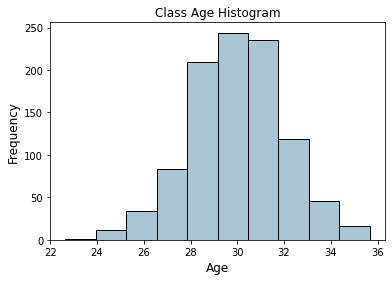

In [20]:
df_age = pd.DataFrame({'Age': np.random.normal(30, 2, 1000) })
fig, ax = plt.subplots()
df_age['Age'].hist(bins=10, color='#A9C5D3', edgecolor='black', grid=False)
ax.set_title('Class Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [21]:
df_age['bucket_w'] = pd.cut(df_age.Age, 3) 
df_age['bucket_w'].value_counts()
print(df_age['bucket_w'].value_counts())# .plot(kind='bar')

df_age['bucket_q'] = pd.qcut(df_age.Age, 3) 
print(df_age['bucket_q'].value_counts())# .plot(kind='bar')

(26.988, 31.328]    684
(31.328, 35.668]    244
(22.635, 26.988]     72
Name: bucket_w, dtype: int64
(22.647, 29.137]    334
(29.137, 30.83]     333
(30.83, 35.668]     333
Name: bucket_q, dtype: int64


In [22]:
df_age['bucket_q'] = pd.cut(df_age.Age, 3,  labels=["Student", "PhD Student", "Post-Doc"]) 
print(df_age['bucket_q'].value_counts())# .plot(kind='bar')

PhD Student    684
Post-Doc       244
Student         72
Name: bucket_q, dtype: int64


In [23]:
 pd.cut(df_age.Age, [10,20,30,40]).value_counts()

(30, 40]    507
(20, 30]    493
(10, 20]      0
Name: Age, dtype: int64

### Missing Values
**It is not unusual for an object to be missing one or more attribute values.** In some cases, the information was not collected; while in other cases, some attributes are inapplicable to the data instances. This section presents examples on the different approaches for handling missing values.

**Pandas treats None and NaN as essentially interchangeable for indicating missing or null values.** To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

* [isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html): Generate a boolean mask indicating missing values
* [notnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html): Opposite of isnull()
* [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html): Return a filtered version of the data
* [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html): Return a copy of the data with missing values filled 

In [24]:
df = pd.DataFrame([[3, 2 ],[3, np.nan],[4,4]], columns=list('AB'))
df

,A,B
0,3,2.0
1,3,NaN
2,4,4.0


The *dropna()* function is used to remove missing values. Determine if rows or columns which contain missing values are removed. 

In [25]:
print(f'Boolean mask\n{df.isnull()} \nDrop missing values')
df.dropna()


Boolean mask
       A      B
0  False  False
1  False   True
2  False  False 
Drop missing values


,A,B
0,3,2.0
2,4,4.0


Drop columns with too many missing values 

In [26]:
df_null = pd.DataFrame([[3, 2 ],[3, np.nan],[4,np.nan]], columns=list('AB'))
df_null

,A,B
0,3,2.0
1,3,NaN
2,4,NaN


In [27]:
# df_null.dropna(axis=1)
# Drop columns using that limit
limit = len(df_null) * 0.7 # How many non-NA values in each column/row? 2
df_null.dropna(axis=1, thresh=limit) # columns having null values more than or equal to 70 percent are dropped from the dataframe

,A
0,3
1,3
2,4


In the following example, the missing values in the 'B' column are replaced by the median value of that column. The values before and after replacement are shown for a subset of the data points.

In [28]:
df['B'] =  df.B.fillna(df.B.median()) # median() exclude NA/null values when computing the result by default
print(f"Replace missing value in 'B' column by the median value \n{df}")


Replace missing value in 'B' column by the median value 
   A    B
0  3  2.0
1  3  3.0
2  4  4.0


<div class="alert alert-block alert-info" style='color:black'>
<b>Tip fillna</b>      
We replace :

* The mean  of the numerical column data is used to replace null values when the data is normally distributed
* Median is used if the data comprised of outliers.
* Mode is used when the data having more occurences of a particular value or more frequent value.
    
</div>

In [29]:
# df_city= pd.DataFrame({'city':["paris", "paris", "", "milan"]})
# df_city = df_city.replace({"": np.nan}) 
# df_city.info()
# most_freq_city = df_city['city'].mode().iloc[0]
# most_freq_city
# df_city.city.fillna(most_freq_city) 

There aren't null values in our dataset! 


In [30]:
print('Are there null target values?   ',df_y.isnull().values.any())
print('Are there null features values? ',df_X.isnull().values.any())

Are there null target values?    False
Are there null features values?  False


### Duplication

Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. 

We  check for duplicate instances in the breast cancer dataset:
* [*duplicated()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html): return boolean Series denoting duplicate rows.

In [31]:
data.duplicated()

AttributeError: duplicated

In [ ]:
data = pd.concat([df_X,df_y], axis=1) 
dups = data.duplicated()
print(f'Are there duplicate rows? = {dups.any()}')
data = data.drop_duplicates() #  drop_duplicates return DataFrame with duplicate rows removed.


There aren't duplicate instances! 

### Scaling
![](images/standardization.jpg)

Dataset can contains different magnitude, units and range. Scaling is a method used to normalize the range of independent variables or features of data. 




In [ ]:
# Example: Why is data scaling important?

# 3 people A,B,C
df_cm_kg = pd.DataFrame({'height_cm':[180,180,100 ], 'weight_kg':[60,58.5,59]}, index=['A','B','C'])
df_m_gr = pd.DataFrame({'height_m':[1.8,1.8,1.0], 'weight_gr':[60000,58500,59000]}, index=['A','B','C'])
print(df_cm_kg)
print(df_m_gr)


In [ ]:
# utility function
def draw_euclidean_distance(A,B,C,figsize=(15, 1), title='A,B,C weight and height (kg and cm)'):
    """ Computes the distance  between the (A,B) and (A,C) points and plot the result """
    
    # computes the distance  between the two points d = √(ΔEx^2 + ΔEy^2) = √((x1-x2)^2 + (y1-y2)^2)
    distance_A_B = np.sqrt( ((A[0]-B[0])**2)+((A[1]-B[1])**2) )
    distance_A_C = np.sqrt( ((A[0]-C[0])**2)+((A[1]-C[1])**2) )
    
    # plot result
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title=title, ylabel='weight', xlabel='height')
    # draw A, B, C
    ax.text(A[0],A[1],'A')
    ax.text(B[0],B[1],'B')
    ax.text(C[0],C[1],'C')

    # draw the distance A , B
    ax.plot((A[0],B[0]),(A[1],B[1]), color='green', linestyle='dashed', marker='o', markerfacecolor='blue',alpha=0.4)
    ax.text((A[0]+B[0])/2,(A[1]+B[1])/2,f'd(A,B): {distance_A_B:.1f}')

    # draw the distance A , C
    ax.plot((A[0],C[0]),(A[1],C[1]), color='red', linestyle='dashed', marker='o', markerfacecolor='blue',alpha=0.4)
    ax.text((A[0]+C[0])/2,(A[1]+C[1])/2,f'd(A,C): {distance_A_C:.1f}')

    plt.show()


In [ ]:
# Draw a scatter plot DF cm and kg
# get A, B, C
A = df_cm_kg.iloc[0,:]
B = df_cm_kg.iloc[1,:]
C = df_cm_kg.iloc[2,:]
draw_euclidean_distance(A,B,C)


# Draw a scatter plot DF m and gr
# get A, B, C
A = df_m_gr.iloc[0,:]
B = df_m_gr.iloc[1,:]
C = df_m_gr.iloc[2,:]
draw_euclidean_distance(A,B,C,figsize=(1,6),title='A,B,C weight and height (gr and m)')

In [ ]:
dfj

In [ ]:
# dfj = df_m_gr.join(df_cm_kg)
# # In descriptive statistics, a box plot is a method of plotting numerical data through their quartiles.
# dfj.plot(kind='box') #
# plt.show()
# dfj.apply(lambda x: (x-x.mean())).plot(kind='box')
# plt.show()
# dfj.apply(lambda x: (x-x.mean())/x.std()).plot(kind='box')
# plt.show()


**Why is data scaling important?**
1. Before comparing the features distribution, because differences between values of features are very high to observe on plot
2. Many ML algorithm calculate the distance between two points by the Euclidean distance during the training phase. **The range of all features should be normalized so that each feature contributes proportionately to the final distance.**

[*sklearn.preprocessing.StandardScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) standardizes the features by removing the mean and scaling to unit variance. The standard score (*z-scores*) of a sample x is calculated as:

`z = (x - u) / s`

where u is the mean of the data samples  and s is the standard deviation of the data samples.

![](images/standardization.png) image from https://youtu.be/2tuBREK_mgE?t=165

In [ ]:
from sklearn.preprocessing import StandardScaler #for Scaling the features

scaler = StandardScaler()
scaled_features =scaler.fit_transform(df_X.values)

df_X_scaled = pd.DataFrame(scaled_features, index=df_X.index, columns=df_X.columns)
df_X_scaled.head(2)

In [ ]:
#df_X.apply(lambda x: (x - x.mean())/x.std())
scaler.inverse_transform(df_X_scaled.values)
# df_X_scaled.values * np.sqrt(scaler.var_) + scaler.mean_

## Visualization and Trends

Let's see the number of samples in the two classes and the percentages.
The plot below represents the class distribution of malignant and benign samples.

Here we have 212 malignants (around 38% of the data) and 357 benign breast cancer masses (62%).

Count plot visualization is done by using [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function.

In [ ]:
#Show the counts of observations using bars.
ax = sns.countplot(df_y) # Returns the matplotlib Axes object


for p in ax.patches: # gets shapes and draws annotations
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2f}%'.format(height/len(df_y)*100), ha="center") 

df_y.value_counts() # Return a Series containing counts of unique values.

 We plot features in 3 groups and each group includes 10 features to observe better.

In [ ]:
df_X_mean= df_X_scaled.iloc[:,:10]
df_X_se= df_X_scaled.iloc[10:20]
df_X_worst =df_X_scaled.iloc[20:30]

As the dataset contain many variables, and relationship between each and every variable is to be analysed, a pair plot is used to visualize the data further. 

It shows the data as a collection of points.  The position of one variable in the same data row is matched with another variable’s value. Each value is a position on either the vertical or horizontal dimension indicates its correlation. 

**It allows both, distribution of single variables and relationships between two variables.** It is an effective method to identify trends for analysis.

To implement pair plots in python seaborn is used and is made by using [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function

In [ ]:
# sns.set(font_scale=1.5)

#Plot pairwise relationships in a dataset.
sns.pairplot(pd.concat([df_X_mean,df_y], axis=1), hue='target')  #hue: Grouping data points with different colors
# sns.pairplot(pd.concat([df_X_se,df_y], axis=1),  hue='target')
# sns.pairplot(pd.concat([df_X_worst,df_y], axis=1),  hue='target')
# ax.set_yticklabels(rotation=90)
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  

1. The *radius*, *area* and *perimeter* characteristics are closely related.
2. The benign tumors have smaller cell nuclei and  Binomial distribution (for *radius*, *area* and *perimeter*)
</div>

**Violin plots** are used to represent comparison of a variable distribution (or sample distribution) across different "categories".
[*seaboarn.violinplot*](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
df_mean = pd.concat([df_X_mean, df_y], axis=1) 

 
# Unpivot the DataFrame from Wide to long format  |Target | Features| Value | [https://bit.ly/3j2Qj1O]
data_for_violinplot = pd.melt(df_mean,id_vars="target",var_name="features", value_name='value')
#violin plot
sns.violinplot(x="features", y="value", hue="target", data=data_for_violinplot, split=True, inner="quart" )
# sns.swarmplot(x="features", y="value", hue="target", data=data_for_violinplot)
plt.xticks(rotation=90) 
plt.tight_layout()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  

1. The *mean concave points*, *mean concavity* and *mean area* have well seperated distribution on target variable (seems to be good predictors)
2. The *mean fractal dimension*, *mean symmetry* and *mean smoothness* have similar distribution on target variable
</div>


## Outliers Detection
Outliers could be indicative of incorrect data, erroneous procedures or experimental areas where some theories may not be valid.

Why finding outliers is important?
* No Valid data (human error, erroneous procedures, instrumentation error, calibration error)
* Data analysis and not only data cleaning (investigating the causes outliers in data)
* Summarize data by statistics that represent the majority of the data
* Train a model that generalizes to new data (remove outilers only in the training set)



### InterQuartile Range 
The Tukey’s boxplot is often used to pinpoint possible outliers. 
In this plot, a box is drawn from the ﬁrst quartile Q1= x[n_sample/4] to the third quartile Q3= x[3 n_sample/4] of the data (the data must be ordered from smallest to largest ). 
Points outside the interval [Q1 − 1.5IQR, Q3 + 1.5 IQR], called the fence (or whisker), are traditionally marked as outliers. 

IQR = Q3 − Q1.
![](images/box_plot_ref_needed.png)

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot( data = df_X_scaled ) 
plt.xticks(rotation=90)  
plt.tight_layout()



$$outlier(x)=\begin{equation}
\left\{ 
  \begin{aligned}
    0&   & (Q1 - 1.5 * IQR)\leq x \leq (Q3 + 1.5 * IQR) \\
    1&   & Otherwise 
  \end{aligned}
  \right.
\end{equation}
$$

where X is the parameter values

In [ ]:
def isOutlier(x):
    # Return True if x < (Q1 - 1.5 * IQR) OR  x > (Q3 + 1.5 * IQR)
    IQR = x.quantile(0.75)-x.quantile(0.25) # Q3 - Q1 
    minimum = x.quantile(0.25) - 1.5 * IQR  # Q1 - 1.5 IQR
    maximum = x.quantile(0.75) + 1.5 * IQR  # Q3 + 1.5 
    return (x < minimum) | (x > maximum )


df_X_clean_iqr = df_X[df_X.apply(lambda x: isOutlier(x)).any(axis=1)]
# ~ is used to invert a boolean Series, https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing

# numpy.all Test whether all array elements along a given axis 1 evaluate to True. 
# we use ~isOutlier as dataframe mask to filter outliers
# you can obtain the same result with: df_X_scaled[~df_X_scaled.apply(lambda x: isOutlier(x))].dropna()
print("How many outliers?",len(df_X)-len(df_X_clean_iqr))


the boxplot assumes symmetry because we add the same amount to Q3 as what we subtract from Q1.**At asymmetric distributions, the usual boxplot typically ﬂags many regular data points as outlying.**



### Z-Score
People often use rules to detect outliers. The classical rule is based on the **z-scores** that we introduced before.
**This technique assumes a Gaussian distribution of the data**. The outliers are the data points that are in the tails of the distribution and therefore far from the mean. 

$$outlier(x)=\begin{equation}
\left\{ 
  \begin{aligned}
    1&   &|X-\hat{X}| \geq 3 \sigma \\
    0&   &|X-\hat{X}| \leq 3 \sigma 
  \end{aligned}
  \right.
\end{equation}
$$

where **X** is the parameter values, $\hat{X}$ is the mean of parameter, and **σ** is its standard deviation.

More precisely, the rule ﬂags xi as **outlying if |zi| exceeds 3**, say.
(This cutoff is based on the fact that when the data are normally distributed, 99.7% of the observations fall within 3 standard deviations around the mean).
We would have considered outliers all the absolute values plotted over the value 3 on the y axis. 

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  
    <p>
However, considering that our slightly skewed distributions and the availability of data is not very high (only 569 observations), it has been preferred to use a "visual" approach for detection (based on density of the points above a specific threshold) and detection of the outliers (very far from the mean). </p>
<b>We notice a not very dense region of points above the 6 value.</b>
    
We suspect there is a mistake
 
</div> 

In [ ]:
df_X_outiler=df_X_scaled[df_X_scaled.apply(lambda x: np.abs(x) > 6).any(axis=1)] 
df_X_outiler # getting outilers data for discussing with domino experts

In [ ]:
data_outiler_noscaled = scaler.inverse_transform(df_X_outiler)
df_X_outiler_noscaled = pd.DataFrame(data_outiler_noscaled, index=df_X_outiler.index, columns=df_X_outiler.columns)
df_to_check = df_X_outiler_noscaled.join(df_y)
df_to_check.to_csv("data/WBCD_outliers_for_doctors.csv")

*Outlier detection is important in medical applications* as well as many other applications that requires concentrating on uncommon activities. **It can identify potential patient management errors or problems with the instrumentation.**

**Let's assume that the doctors confirm to us that the 12 outliers we found
they are invalid data that we can then eliminate from our analysis.**

<div class="alert alert-block alert-warning" style='color:black'>
<b>NOTE:</b>
Before removing them we should discuss with domino experts to understand why these points are not valid (for example, the measuring equipment failed, the measurement method was unreliable for some reason, there were contaminants, etc ...).
</div>

In [ ]:
df_X_clean=df_X_scaled[df_X_scaled.apply(lambda x: np.abs(x) < 6).all(axis=1)] 
print("How many outliers?",len(df_X_scaled)-len(df_X_clean))

plt.figure(figsize=(16,8))
sns.boxplot( data = df_X_clean )
plt.xticks(rotation=90)  
plt.tight_layout()

In [ ]:
%%html
<marquee style='width: 30%; color: red;'><b>Important! Golden Rules</b></marquee>

it’s important to investigate the nature of the outlier before deciding whether to drop it or not.
* <div class="alert alert-block alert-warning" style='color:black'> <b>DROP</b> If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop the outlier.</div>

For example a year field with a '9999' value. This is can be a human, instrument error or calibration error.

* <div class="alert alert-block alert-warning" style='color:black'><b>DROP AND EXPLAIN WHY</b> More commonly, the outlier can affect results. In this situation, it is not legitimate to simply drop the outlier. You may run the analysis both with and without it.</div>

For example, you can remove the outliers (**only in the training dataset used to build the model**) and compare the result with the model obtained from raw data. We will talk about predictive models, training sets and testing sets in the next lesson.


We saw some simple univariate outlier detection techniques,  you can find more details in the [APPENDIX](#APPENDIX).

## Correlation
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data and as a diagnostic for advanced analyses. [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [ ]:
sns.set(font_scale=0.8)
plt.figure(figsize=(16,9))
sns.heatmap( df_X_clean.corr(),  square = False, annot=True, fmt=".2f")
plt.show()

### Discovering structure in heatmap data

We can the correlation matrix as a hierarchically-clustered heatmap in order to find easly the pattern, for example the variables highly correlate with each other. [seaborn.clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

In [ ]:
sns.set(font_scale=1.0)
# Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables.
corr_matrix = df_X_clean.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f",figsize=(20,14)) # Plot the correlation matrix as a hierarchically-clustered heatmap.
plt.title("Correlation Between Features")
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  
 Radius, area and perimeter (mean, the worst, and the standard error ) have stronge positive correlation. 
</div>

[seaborn.jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html) : plotting a bivariate relationship and distributions.

In [ ]:
import scipy.stats as stats #  library of statistical functions (we'll use to compute pearson correlation)

# Plot correlation between 2 features and distribution
sns.set(style="white")

# seaborn.jointplot draws a plot of two variables with bivariate and univariate graphs
ax = sns.jointplot(df_X_clean.loc[:,'mean area'], 
              df_X_clean.loc[:,'mean radius'], 
              kind="reg" )

ax.ax_joint.text(-1,5, f"Pearsonr's correlation: {stats.pearsonr(df_X_clean.loc[:,'mean area'], df_X_clean.loc[:,'mean radius'])[0]:.2f}")

# sns.jointplot(df_X_clean.loc[:,'mean radius'], 
#               df_X_clean.loc[:,'mean area'], 
#               kind="reg")
# sns.jointplot(df_X_clean.loc[:,'mean area'], 
#               df_X_clean.loc[:,'mean perimeter'], 
#               kind="reg")
plt.show()

### Removing multi colinearity
<div class="alert alert-block alert-warning" style='color:black'>
Two highly correlated input variables probably carry similar information. 
We can remove multi colinearity, it means the columns are dependenig on each other so we should avoid it because what is the use of using same column twice.
</div>

So, we can drop _worst radius,worst area,worst perimeter,area error, area error, perimeter error, radius error, mean perimeter, mean radius_ columns (they have a strong correlation with  _mean area_) and leave only _mean area_.


In [ ]:
## get original scale
data_noscaled = scaler.inverse_transform(df_X_clean)
df_X_clean_noscaled = pd.DataFrame(data_noscaled, index=df_X_clean.index, columns=df_X_clean.columns)
## drop multicolinearity variables
df_X_clean_noscaled = df_X_clean_noscaled.drop(['worst radius','worst area','worst perimeter','area error', 'area error', 'perimeter error', 'radius error', 'mean perimeter', 'mean radius'],axis=1)
df_X_clean_noscaled.head(2)

In [ ]:
## saving the preprocessed data on CSV file
df_X_y_clean = df_X_clean_noscaled.join(df_y)
df_X_y_clean.to_csv("data/WBCD_preprocessed.csv")  # create the 'data' folder before to save

Correlation ‘among the predictors’ is a problem to be rectified to be able to come up with a reliable model.
Another measure that is commonly used to help diagnose multicollinearity is presented in the [APPENDIX](#APPENDIX).

# Dimensionality Reduction
Datasets often have many (hundreds or even thousands) features and dropping redundant variables is not enough to reduce the dimensionality of the dataset.

Too many variables can cause such problems below:
* Increased computational cost
* Too complex visualization problems
* Decrease efficiency by including variables that have no effect on the analysis
* Make data interpretation difficult




more details and other dimensionality reduction algorithms are listed in the [APPENDIX](#APPENDIX).

## Principal Component Analysis (PCA)
[Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

**PCA reduces the dimensionality of a dataset, while preserving as much ‘variability’ (i.e.statistical information) as possible.
It converts a set of possibly correlated predictors into a set of linearly uncorrelated variables**
(using [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) of the data to project it to a lower dimensional space). 

<!-- PCA is based on two basic considerations: 
* high correlation between variables indicates redundancy in the data; 
* the most important variables express higher variance. 

Based on these considerations, the model simplifies the complexity of the variables; -->

**PCA tries to explain the covariance structure of the data by means of a (hopefully small) number of components `(PC1, PC2,..,PCn)=PCA(X1,X2,...,Xn)`.These components are linear combinations of the original variables**, and often allow for an interpretation and a better understanding of the different sources ofvariation. 

<!-- ![](img/pca.png)  -->



In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/g-Hb26agBFg?mute=1&start=49&end=120&cc_load_policy=1&fs=0&iv_load_policy=3&rel=1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Before applying PCA, we scale our data such that each feature has unit variance. This is necessary because fitting algorithms highly depend on the scaling of the features


In [ ]:
scaler = StandardScaler() # scaling data before PCA
scaled_features =scaler.fit_transform(df_X_clean_noscaled.values)
df_X_clean_scaled = pd.DataFrame(scaled_features, index=df_X_clean_noscaled.index, columns=df_X_clean_noscaled.columns)

[*sklearn.decomposition.PCA*](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 

In [ ]:
df_X_clean_scaled.shape

In [ ]:
from sklearn.decomposition import PCA # Principal Component Analysis module

pca2d = PCA(n_components=2)  
pc = pca2d.fit_transform(df_X_clean_scaled.values) # computes PCA components and trasforms original data

pc_df = pd.DataFrame(data = pc , columns = ['PC1', 'PC2'])
pc_df['target'] = df_X_y_clean.target.values

print(pc_df.shape)
pc_df.head(3)

In [ ]:
# Now, we can create a visualization of our dataset
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=pc_df, x="PC1", y="PC2", hue="target" # Grouping data points with different colors
)
plt.title('PCA Scatter Plot')
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  
it can be deduced that the data are linearly separable and therefore a linear model could be an good solution to solve a classification problem. 
</div>


*In the PCA, the next question is “how many principal components are we going to choose for our new feature subspace?*

A number of principal components must be considered such that they **take into account a sufficiently high percentage of total variance** (at least 70%, for example, when stop increasing substantially). When defining the minimum percentage of acceptable variance, the number of original variables should be taken into account, so that as the number of variables increases, a lower percentage of explained variance may be accepted.

**The explained variance tells us how much information (variance) can be attributed to each of the principal components**


In [ ]:
pca2d.explained_variance_ratio_

In [ ]:
from sklearn.decomposition import PCA
pca10 = PCA(n_components=10)
pca10.fit(df_X_clean_scaled.values)

plt.figure(1, figsize=(14, 7))
plt.bar(range(1,11,1), pca10.explained_variance_ratio_, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1,11,1),pca10.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title("Around 95% of variance is explained by the Fisrt 10 components ");
plt.legend(loc='best')
plt.axhline(y=0.7, color='r', linestyle='-') # 70% of  explained variance
plt.tight_layout()

* PC1 describes most of the variability in the data, PC2 adds the next big contribution, and so on. In the end, the last PCs do not bring much more
information to describe the data.
* Thus, to describe the data we could use only the top m < n (i.e., i;, PC1, ⋯ PCn) components with little - if any - loss of information

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>   A good number of principal component can be 6 because the total explained variance stops increasing substantially or I can choose 3 with the explained variance of 74% is enough (and the rest is noise)  </div>

In [ ]:
pca3d = PCA(n_components=3)
pc3 = pca3d.fit_transform(df_X_clean_scaled.values)

from mpl_toolkits.mplot3d import Axes3D # 3D scatter plot
fig = plt.figure(figsize=(12,7))
ax = Axes3D(fig) 

cmap = {'benign':'orange','malignant':'blue'}
ax.scatter(pc3[:,0], pc3[:,1], pc3[:,2], c=[cmap[c] for c in  df_X_y_clean.target.values],
           marker='o', s=20)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(30,-110)
plt.show()

You can find more dimensionality reduction techniques in the [APPENDIX](#APPENDIX).

# Clustering
Discover hidden structures in unlabeled data (unsupervised).
Clustering identifies a finite set of groups (clusters) C1, C2 ⋯ , Ck in the dataset such that:
* Objects within the same cluster Ci shall be as similar as possible
* Objects of different clusters Ci, Cj (i ≠ j) shall be as dissimilar as possible

Clustering algorithms can be categorized based on their cluster model.

## K-Means
**K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.**
The means are commonly called the cluster “centroids”; 
![image](images/cluster1.jpg)
**K-Means Algorithm:**
1. Guess some cluster centers
2. Repeat until converged
    - *Find closest centroid*: assign points to the nearest cluster center
    - *Update centroid*: set the cluster centers to the mean
    
[Visualizing K-Means Clustering](https://stanford.edu/class/engr108/visualizations/kmeans/kmeans.html)

<img src='images/1_rwYaxuY-jeiVXH0fyqC_oA.gif'>

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html): The KMeans estimator class in scikit-learn perform  K-Means Clustering.

<!-- 1. Getting  K values as input which is the number of clusters or centroids
2. Selecting random centroids for each cluster
3. Assigning each data point to its closest centroid (Euclidean distance)
4. Adjusting the centroid for the newly formed cluster in step 3
5. Repeating step 3 and 4 till all the data points are perfectly organised within a cluster space -->


In [ ]:
from sklearn.cluster import KMeans
X = df_X_clean_scaled.values

 # k-means++ is an algorithm for choosing a good initial centroids (far away from each other). https://en.wikipedia.org/wiki/K-means%2B%2B
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X)

pd.Series(kmeans.labels_, name='cluster')

## The Good Number Of Clusters
Each cluster is formed by calculating and comparing the distances of data points within a cluster to its centroid. An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS or SSE). 

WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

![image.png](images/1_zlZOSJB_DISgUxb06QwISw.png)

We can find the good value for K using an Elbow point graph. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value.
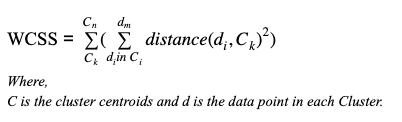

In [ ]:
X = df_X_clean_scaled.values
from sklearn.cluster import KMeans
wcss = []
n_clusters = 6
for i in range(1, n_clusters+1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # k-means++ is an algorithm for choosing a good initial centroids. 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, n_clusters+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x=2, color='r', linestyle='-')
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>   The “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.
For the above-given graph, the good value for K would be 2 </div>


In [ ]:
# k-means++ is an algorithm for choosing the initial centroids. New centroid is a far point from the other centroids
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X)

centroid = pca2d.transform(kmeans.cluster_centers_)
centroid

In [ ]:
# df_X_scaled_y_clean = df_X_clean_scaled.join(df_y)

# get features vector mean for Benign and Malignant 
mean_pca_M = pca2d.transform([df_X_clean_scaled [df_y == 'malignant'].mean().values])
mean_pca_B = pca2d.transform([df_X_clean_scaled [df_y == 'benign'].mean().values])

# or
# mean_pca_M = pca2d.transform([df_X_scaled_y_clean[ df_X_scaled_y_clean['target']=='malignant'].iloc[:,:-1].mean().values])
# mean_pca_B = pca2d.transform([df_X_scaled_y_clean[ df_X_scaled_y_clean['target']=='benign'].iloc[:,:-1].mean().values])

plt.figure(figsize=(10, 8))
cmap = {'benign':'orange','malignant':'blue'}
# plots kemans clusters  
cmap = {1:'orange',0:'blue'}
plt.scatter(pc_df.iloc[:,0], pc_df. iloc[:,1], c=[cmap[c] for c in  kmeans.labels_] )
# plots kemans centroids  
plt.scatter(centroid[:,0],centroid[:,1], c='black', marker='x',s=100,
            label="cluster centroids")  
# plots features vector mean for Benign and Malignant 
plt.scatter([mean_pca_M[:,0], mean_pca_B[:,0]],[mean_pca_M[:,1], mean_pca_B[:,1]], c='red',marker='+',s=50,
            label="mean target class (b,m)") 

plt.legend()
plt.title('PCA Scatter Plot (green cluster 0, red cluster 1)')
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  : It is interesting to see how the centroids of the clusters fall very close to the average values of the two classes of tumors (benign and malignant). Therefore it is possible to note that, if we did not have a labeled dataset (with well-defined classes B and M) we would still be able to determine (with good probability) the class of belonging of the dataset elements, through an unsupervised clustering process .</div>

Hierarchical clustering is presented in the [APPENDIX](#APPENDIX)

# APPENDIX

This appendix includes further information on the course topics but **will not be exam topics**.

## Exploratory data analysis 

## Missing values
[KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) The k nearest neighbors algorithm can be used for imputing missing data by finding the k closest neighbors to the observation with missing data and then imputing them based on the the non-missing values in the neighbors.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

### Data Preprocessing: Convert Skewed data to Normal Distribution
When it comes to skewed distributions, the most common
response is to transform the data
Generally, the most common type of skewness is
right-skewness
Consequently, the most common type of transformation is the
log transform

In [ ]:
from scipy.stats import skewnorm
df_skewed = pd.DataFrame({'car_crash': skewnorm.rvs(10, size=100)+1}) # positive skewed data
sns.distplot(df_skewed)

In [ ]:


fig, ax = plt.subplots()
## log  transformation: can't be applied to zero or negative values
sns.distplot(np.log(df_skewed))
##square root transformation
sns.distplot(np.sqrt(df_skewed))


## Exploring dataset: Decision Tree
Although still under data exploration, we can get useful information by training a Decision Tree from all characteristics. We will explain the Decision Tree model better in the second part of this lesson.

In [ ]:
from sklearn import tree
X = df_X_clean_scaled.values
y = df_X_y_clean.target.values 

clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=8)  
clf.fit(X, y)

fig = plt.figure(figsize=(25,20))
out = tree.plot_tree(clf, 
                   feature_names=df_X_clean_scaled.columns,  
                   class_names=['Malignant','Benign'],
                   filled=True)
for o in out: 
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

## Outliers Detection

1. [Leys C, Delacre M, Mora YL, Lakens D, Ley C. How to Classify, Detect, and Manage Univariate and Multivariate Outliers, With Emphasis on Pre-Registration. International Review of Social Psychology. 2019;32(1):5. DOI: http://doi.org/10.5334/irsp.289](https://www.rips-irsp.com/articles/10.5334/irsp.289). 
2. [Rousseeuw, P.J. and Hubert, M. (2018), Anomaly detection by robust statistics. WIREs Data Mining Knowl Discov, 8: e1236.](https://doi.org/10.1002/widm.1236)

They suggest the use of the median absolute deviation (MAD) to detect univariate outliers. 
Again, the idea is conceptually similar to computed z-scores: for each value, subtract the median from it, and divide by the median of the absolute deviations.

In [ ]:
def mad(x):
    return 1.483 * np.median(np.abs(x- np.median(x)))

df_X_clean_mad = df_X[df_X.apply(lambda x: (x - np.median(x))/mad(x) <= 3.0).all(axis=1)]
print("How many outliers?",len(df_X)-len(df_X_clean_mad))


### Multivariate
[Sklearn includes different advanced outlier detection methods based on machine learning (ML)](https://scikit-learn.org/stable/modules/outlier_detection.html) can handle correlated multivariate dataset, detect abnormalities within them, and do not assume a normal distributions of the features.

## Correlation


Another measure that is commonly used to help diagnose multicollinearity is the **variance inflation factor (VIF)**.
Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. **VIF is preferred as it can show the correlation of a variable with a group of other variables.**


VIF measures how much of the variation in one variable is explained by the other variable. This is done by running a regression using one of the correlated x variables as the dependent variable against the other variables as predictor variables.
![](images/vip.png)

Use the following guidelines to interpret the VIF:

|VIF| Status of predictors|
|------|------|
|VIF = 1|Not correlated|
|1 < VIF < 5|Moderately correlated|
|VIF > 5 to 10|Highly correlated|



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = df_X_scaled.columns

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df_X_scaled.values, i) 
                          for i in range(len(df_X_scaled.columns))] 
  
print(vif_data.sort_values(by='VIF', ascending=False ))

 _mean radius_ is  highly correled to the other variable. Dropping variables should be an iterative process starting with the variable having the largest VIF. 
 


## Dimensionality Reduction 
### Feature Selection using Scikit Learn
Feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. 
* [SelectKBest()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) removes all but the k highest scoring features
[The Chi-square (χ2) test](https://en.wikipedia.org/wiki/Chi-squared_test) is used to examine whether observed data fits with expected data.

It is a test of independence and it is used to determine if there is a significant relationship between two variables. **Recall that the chi-square test measures dependence between stochastic variables**, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
def selector(X, y, k=12):
    
    """The function receive features and labels (X, y) and a target number to select features (k)
    base on the chi-square (χ2) and return a new dataframe wiht k best features"""
    
    selector = SelectKBest(chi2, k)
    
    best_X = selector.fit_transform(X, y)
    
    return pd.DataFrame(best_X, columns=X.columns[selector.get_support()])

best_X = selector(df_X_clean_noscaled, df_X_y_clean.target, 5)

best_X.head()


### PCA
PCA is a statistical procedure that (orthogonally) transforms the original n coordinates of a data set into a new set of n coordinates,
called principal components.

`(PC1, PC2,..,PCn)=PCA(X1,X2,...,Xn)`

The first principal component PC1 follows the direction (eigenvector) of the largest possible variance (largest eigenvalue of the covariance matrix) in the data.

Each succeeding component PCk follows the direction of the next largest possible variance under the constraint that it is orthogonal to (i.e., uncorrelated with) the preceding components

In a nutshell, The principal components  are eigenvectors of the data's covariance matrix. Thus, the principal components are often computed by eigendecomposition of the data covariance matrix or singular value decomposition of the data matrix. 
![](images/pca_2.jpg)

### Visualize Loadings
It is also possible to visualize loadings using shapes, and use annotations to indicate which feature a certain loading original belong to. 

* PCA loading plot which shows how strongly each characteristic influences a principal component.

For more details about the linear algebra behind eigenvectors and loadings, see this [Q&A thread](https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another).


In [ ]:
from src.utils import biplot_pca
biplot_pca( pc_df, pca2d, df_X_clean_scaled.columns.values)

Continuing the exploratory process aimed at understanding how to simplify the dataset, without losing relevant information, the following processes were applied:  UMAP and TSNE , which are techniques for reducing complexity; in particular:
### TSNE and UMAP
* [TSNE (T-distributed Stochastic Neighbor Embedding)](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) is a non-linear dimensionality reduction technique that is particularly suited to reducing the complexity of multidimensional datasets in a two- or three-dimensional model. **It is better than PCA, but it is computationally expensive**
* [UMAP (Uniform Manifold Approximation and Projection)](https://arxiv.org/abs/1802.03426) is a dimension reduction technique that can be used for visualisation **similarly to t-SNE, but with superior run time performance.**

By reducing the dimension in a way that preserves as much of the structure of the data as possible we can get a visualisable representation of the data allowing us to “see” the data and its structure and begin to get some intuition about the data itself.

In [ ]:
import sys 
#  umap-learn for umap dimension reduction
!{sys.executable} -m pip install pip -U
!{sys.executable} -m pip install umap-learn

In [ ]:
from umap import UMAP
from sklearn.manifold import TSNE
import time 
X = df_X_clean_scaled.values
y = df_X_y_clean.target.values 

print(f"[{time.asctime(time.localtime())}] Starting")
# Invoke the TSNE method
tsne_results = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=2000).fit_transform(X)
print(f"[{time.asctime(time.localtime())}] Completed TSNE")
# Invoke the UMAP method
reducer = UMAP().fit_transform(X) 
print(f"[{time.asctime(time.localtime())}] Completed UMAP")
# Invoke the PCA method
pc = PCA(n_components=2).fit_transform(X)
print(f"[{time.asctime(time.localtime())}] Completed PCA")

# Plot the TSNE and PCA visuals side-by-side
cmap = {'benign':'orange','malignant':'blue'}
fig = plt.figure(figsize = (15,9))

plt.subplot(2, 2, 1)
plt.title('TSNE Scatter Plot')
plt.scatter(tsne_results[:,0], tsne_results[:,1],  c =[cmap[x] for x in y] , alpha=0.75)

plt.subplot(2, 2, 2)
plt.title('UMAP Plot')
plt.scatter( reducer[:,0], reducer[:,1], c =[cmap[x] for x in y] ,alpha=0.75)
      
plt.subplot(2, 2, 3)
plt.title('PCA Plot')
plt.scatter( pc[:,0], pc[:,1], c =[cmap[x] for x in y] ,alpha=0.75)


plt.show()

## Clustering
Clustering techniques can be divided into two approaches: partition (like Kmeans) and hierarchical. The next section introduces hierarchical clustering, but before we will introduce a well-known clustering quality measure.

We suggest [Amit Saxena et al., A review of clustering techniques and developments, 2017](https://doi.org/10.1016/j.neucom.2017.06.053) paper for comprehensive study on clustering



### Silhouette: Clustering quality measure
Silhouette-Coefficient measures the quality of clustering
* a(x): distance of object x to its cluster representative
* b(x): distance of object x to the representative of the second-best cluster
* Silhouette s(x) of x
![image.png](images/silhouette.png)

Computes silhouette coefficients for each point, and **average it out for all the samples to get the silhouette score**.

**The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).**
The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
# The silhouette_score gives the average value for all the samples.
silhouette_score(X,  kmeans.labels_)

In [ ]:
from src.utils import kmeeans_silhouette_analysis
sns.set_style('darkgrid') 
kmeeans_silhouette_analysis(X, range(2, n_clusters+1))

hierarchical clustering is presented in the [APPENDIX](#APPENDIX). The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  

    
* In our example, the analysis of the silhouette is used to choose an optimal value for the number of clusters. The silhouette plot shows that a n_clusters value of 5 and 6 is not good because they have the silhouette score lower than average scores, many negative values and also large fluctuations in the size of the silhouette plot. **From the analysis of the silhouette, a good number of k clusters appears to be 2 since it confirms what has already been expressed by the elbow method.**

* Both Elbow method / SSE Plot and Silhouette method can be used interchangeably based on the details presented by the plots. It may be good idea to use both the plots just to make sure that you select most optimal number of clusters.

</div>

### Hierarchical clustering

In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. [wiki](https://en.wikipedia.org/wiki/Hierarchical_clustering)
**Construction of a hierarchy of clusters (dendrogram) by merging/separating clusters with minimum/maximum distance**
* The agglomerative follows the bottom-up approach, which builds up clusters starting with single object and then merging these atomic clusters into larger and larger clusters using a linkage function, until all of the objects are finally lying in a single cluster or otherwise until certain termination conditions are satisfied**. 
* The divisive hierarchical clustering follows the top-down approach, which breaks up cluster containing all objects into smaller clusters, until each object forms a cluster on its own or until it satisfies certain termination conditions. The hierarchical methods usually lead to formation of dendrograms as shown.

<img src='images/hclustering.jpg' />

**Base Algorithm**
1. Form initial clusters consisting of a single object, and compute the distance between each pair of clusters.
2. Merge the two clusters having minimum distance.
3. Calculate the distance between the new cluster and all other clusters.
4. If there is only one cluster containing all objects: Stop, otherwise go to step 2. 

<img src='images/hclustering_measures.jpg' width='700' />

We used the Ward linkage method, it has the highest performance in most situations, except when there were verylarge differences among cluster sizes. 
[A COMPARISON OF HIERARCHICAL METHODS FOR CLUSTERING FUNCTIONAL DATA](https://people.stat.sc.edu/Hitchcock/compare_hier_fda.pdf)

In [ ]:
from src.utils import plot_dendrograms
plot_dendrograms(X) # Ward dendrom has well separated and compact clusters 

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage,median  # linkage analysis and dendrogram for visualization
from scipy.cluster.hierarchy import fcluster  # simple clustering
from scipy.spatial.distance import pdist, squareform # metric

sns.set_style('whitegrid') 
X = df_X_clean_scaled.values
#Perform hierarchical/agglomerative clustering using Ward method. 
# Ward = Similarity of two clusters is based on the increase in squared error when two clusters are merged
Z = linkage(X, method='ward', metric='euclidean') 

plt.figure(figsize=(15, 7))
# plots dendograms
dendrogram(
    Z,    
    leaf_rotation=90.,
    leaf_font_size=11.,
    show_contracted=True,
    distance_sort='descending',
    truncate_mode = 'lastp',
    p=50
)

plt.tight_layout()

* horizontal lines are cluster merges
* vertical lines tell you which clusters/labels were part of merge forming that new cluster
* heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster
* a huge jump in distance is typically what we're interested to find the optimal number of clusters. 

The dendrogram function with Ward method divides the data into 2 groups (it cuts to 70% of the maximum length) by default 
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
    
The 2 clusters are well separated.

There are some automated Cut-Off selection methods [but they are not very reliable](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)


In [ ]:
# getting clusters from dendogram
k=2
clusters = fcluster(Z, k, criterion='maxclust')
clusters

In [ ]:
#  features vector mean for Benign and Malignant 
mean_pca_M = pca2d.transform([df_X_clean_scaled [df_y == 'malignant'].mean().values])
mean_pca_B = pca2d.transform([df_X_clean_scaled [df_y == 'benign'].mean().values])

# features vector mean for clusters
mean_pca_c1 = pca2d.transform([df_X_clean_scaled[clusters == 1].mean().values])
mean_pca_c2 = pca2d.transform([df_X_clean_scaled[clusters == 2].mean().values])

plt.figure(figsize=(10, 8))
# plot points with cluster dependent colors
plt.scatter(pc_df.iloc[:,0], pc_df.iloc[:,1],c= clusters, cmap='prism', s=20)  
# plots hcluster centroids  
plt.scatter([mean_pca_c2[:,0], mean_pca_c1[:,0]],[mean_pca_c2[:,1], mean_pca_c1[:,1]], c='black', cmap='prism',marker='x',s=100,
            label="cluster centroids")  
# plots features vector mean for Benign and Malignant 
plt.scatter([mean_pca_M[:,0], mean_pca_B[:,0]],[mean_pca_M[:,1], mean_pca_B[:,1]], c='blue', cmap='prism',marker='+',s=50,
            label="mean target class (b,m)") 

plt.legend()
plt.title('PCA Scatter Plot (green cluster 0, red cluster 1)')
plt.show()

Comparison between real centroids and hierarchical clustering centroids

In [ ]:
silhouette_score(X,  clusters)